## Analyse Time Complexity:

### 1. Dijkstra with adjacency matrix and array-based priority queue:
Graph with set of vertices V and set of edges E:
$$
\begin{aligned}
T(C) &= O(V^2) \\
S(C) &= O(V)
\end{aligned}
$$

1. Initialisation of `distList` and `predecessorMap` takes $O(2V) \approx O(V)$ 
1. `for _ in range(numVertices):` will take $O(V)$. 
    Inside the loop, `for vertex in range(numVertices):` and `for ver in range(numVertices):` each takes $O(V)$
1. The total time complexity will be $O(2V + V\cdot(V+V)) = O(2V + 2V^2) \approx O(V^2)$

## 2. Dijkstra with array of adjacency lists and min-heap:
Graph with set of vertices V and set of edges E:
$$
\begin{aligned}
T(C) &= O((E+V)logV) \\
S(C) &= O(V+E)
\end{aligned}
$$

1. Initialisation of `distList` and `predecessorMap` takes $O(2V) \approx O(V)$ 
1. `while minHeap:` will take V iterations. In each iteration we do a `heappop` operation which takes $O(VlogV)$. 
1. `for vertex, weight in graph.get(currentNode, []):` will go through each edge once and each edge may require a `heappush` operation which takes $O(logV)$. Thus the total complexity is $O(ElogV)$
1. The total time complexity will be $O(2V + (E+V)logV) \approx O((E+V)logV)$

## 3. Generate Datasets for testing


### We decide to use sparse, medium and dense graphs to test our algorithms.
### Densities allocated:
1. Sparse: 0.2
1. Medium: 0.5
1. Dense: 0.8

## For each density, we run for three different sizes:
1. Small graph: 10 to 100 vertices
1. Medium graph: 100 to 500 vertices
1. Large graph: 500 to 1000 vertices

<i> For each number of vertice, we do three runs for each algorithm and then obtain the average for analysis</i>

In [4]:

import random 
import DijkstraList 
import DijkstraMatrix
import time

def generate_random_matrix_graph(V, density, max_weight):
    #initialise matrix
    adj_matrix = [[0]*V for _ in range(V)]

    #populate the matrix
    for i in range(V):
        for j in range(i+1, V):
            #if less than density, include the edge
            if random.random() < density:
                wei = random.randint(0, max_weight)
                adj_matrix[i][j] = wei
                adj_matrix[j][i] = wei
    return adj_matrix



def generate_random_list_graph(V, density, max_weight):
    #initialise adj_list
    adj_list = {node: [] for node in range(V)}

    #populate the list
    for i in range(V):
        for j in range(i+1, V):
            if random.random() < density:
                wei = random.randint(0, max_weight)
                adj_list[i].append((j, wei))
                adj_list[j].append((i, wei))
    return adj_list



def generate_data(start, end, density, type, max_weight=100):
    '''
    start, end: starting and ending number for range of vertices
    density: 0 to 1
    type: 1 refers to DijkstraList, 2 refers to DijkstraMatrix
    max_weight: graph weight initialised to 100
    '''
    results = []
    for sz in range(start, end+1):
        #run the DijkstraList
        if type==1:
            average = 0
            for _ in range(3):
                #generate the list
                adj_list = generate_random_list_graph(sz, density, max_weight)
                start_time = time.time()
                DijkstraList.dijkstraList(adj_list, 0)
                end_time = time.time()
                list_time = end_time - start_time
                average += list_time
            results.append({
                    'V': sz,
                    'density': density,
                    'list_time': average/3
                })
        else:
            average = 0
            for _ in range(3):
                #generate the list
                adj_matrix = generate_random_matrix_graph(sz, density, max_weight)
                start_time = time.time()
                DijkstraMatrix.dijkstraMatrix(adj_matrix, 0)
                end_time = time.time()
                matrix_time = end_time - start_time
                average += matrix_time
            results.append({
                'V': sz,
                'density': density,
                'matrix_time': average/3
            })
    return results

            


### Dijkstra_matrix


### small graph with sparse, medium and dense densities graph 

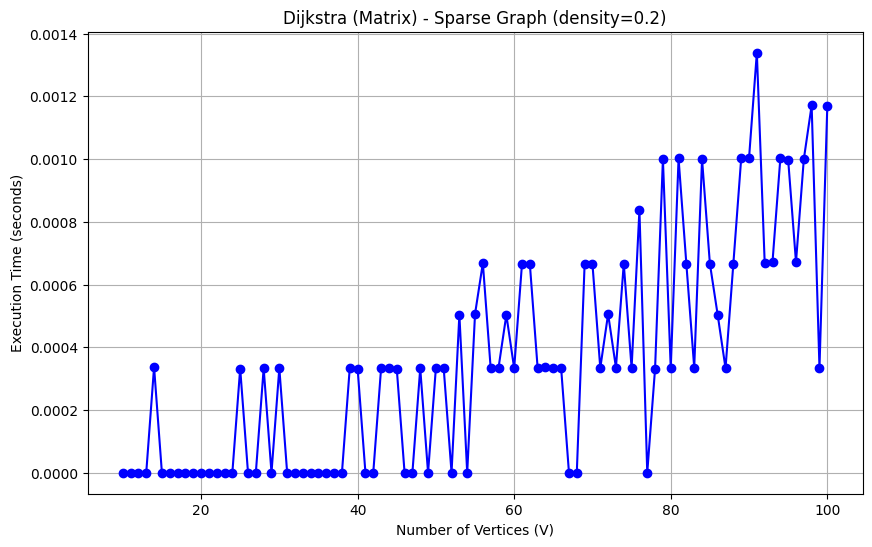

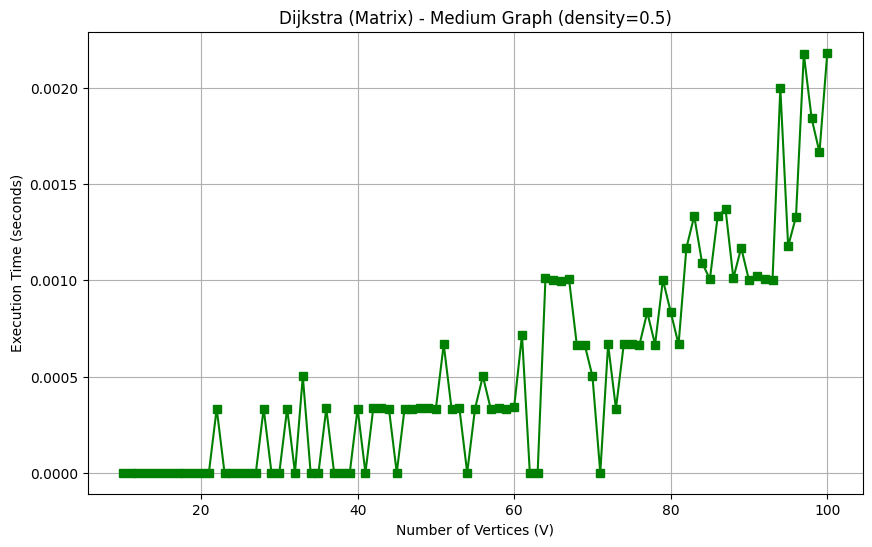

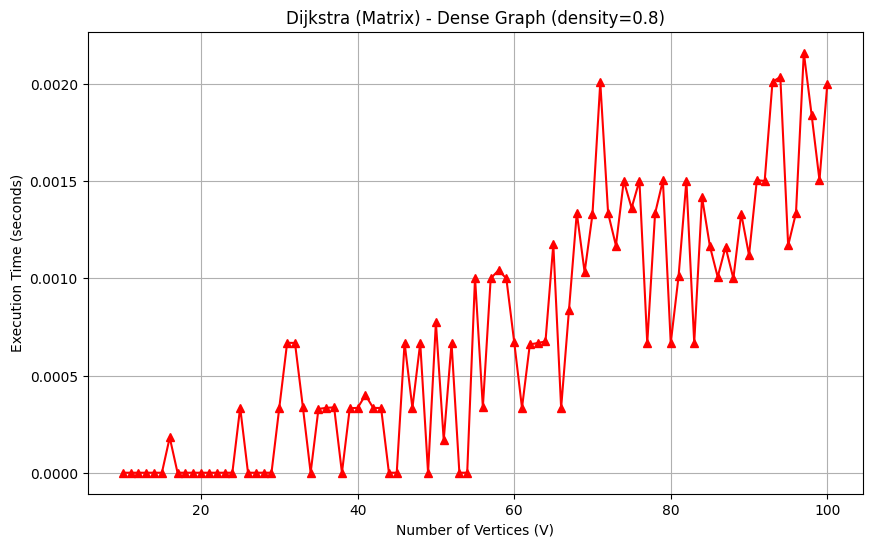

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

small_graph_sparse = generate_data(10, 100, 0.2, 2)
small_graph_medium = generate_data(10, 100, 0.5, 2)
small_graph_dense = generate_data(10, 100, 0.8, 2)

# Convert to DataFrames
df_sparse = pd.DataFrame(small_graph_sparse)
df_medium = pd.DataFrame(small_graph_medium)
df_dense = pd.DataFrame(small_graph_dense)

# --- Sparse Graph ---
plt.figure(figsize=(10,6))
plt.plot(df_sparse['V'], df_sparse['matrix_time'], marker='o', color='blue')
plt.xlabel("Number of Vertices (V)")
plt.ylabel("Execution Time (seconds)")
plt.title("Dijkstra (Matrix) - Sparse Graph (density=0.2)")
plt.grid(True)
plt.show()

# --- Medium Graph ---
plt.figure(figsize=(10,6))
plt.plot(df_medium['V'], df_medium['matrix_time'], marker='s', color='green')
plt.xlabel("Number of Vertices (V)")
plt.ylabel("Execution Time (seconds)")
plt.title("Dijkstra (Matrix) - Medium Graph (density=0.5)")
plt.grid(True)
plt.show()

# --- Dense Graph ---
plt.figure(figsize=(10,6))
plt.plot(df_dense['V'], df_dense['matrix_time'], marker='^', color='red')
plt.xlabel("Number of Vertices (V)")
plt.ylabel("Execution Time (seconds)")
plt.title("Dijkstra (Matrix) - Dense Graph (density=0.8)")
plt.grid(True)
plt.show()

### Analysis:

As the number of vertices increases, the overall execution time increases. The fluctuation can be attributed to randomness of weight assignment and edge generation. <b>Execution time similar for all three densities.</b>

### Medium graph with sparse, medium and dense densities graph 

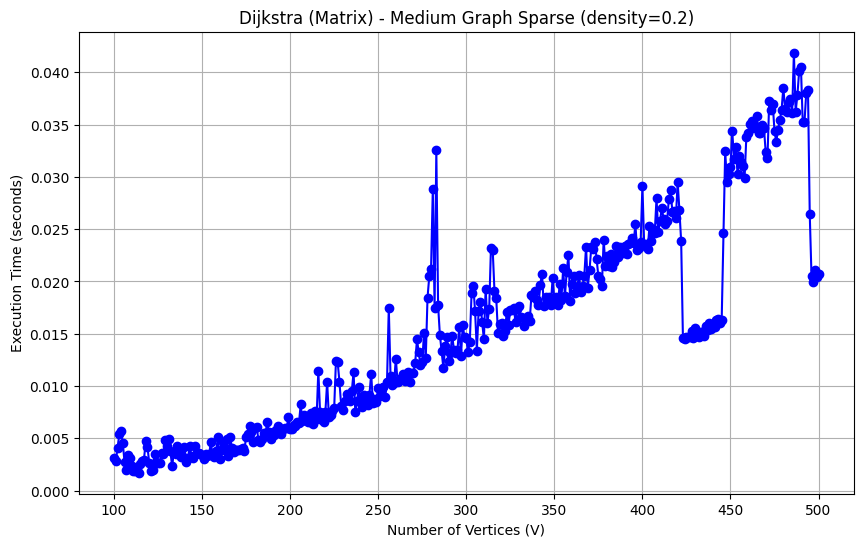

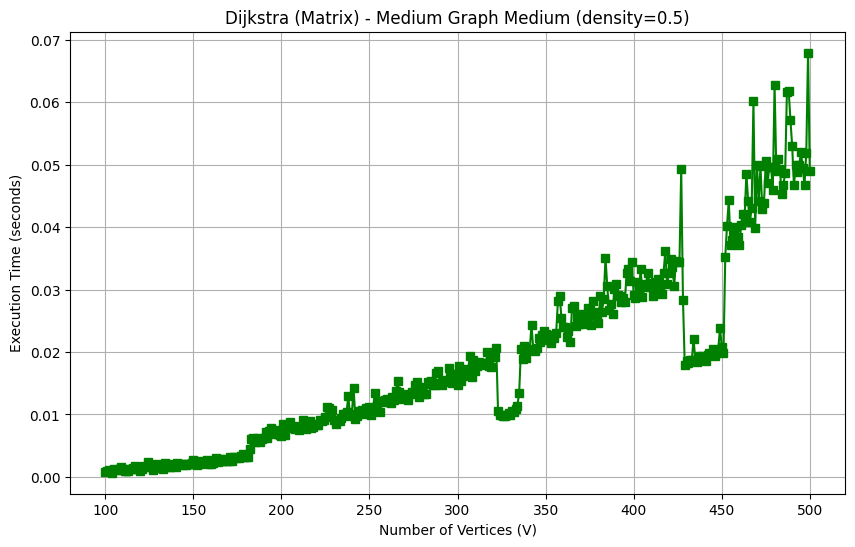

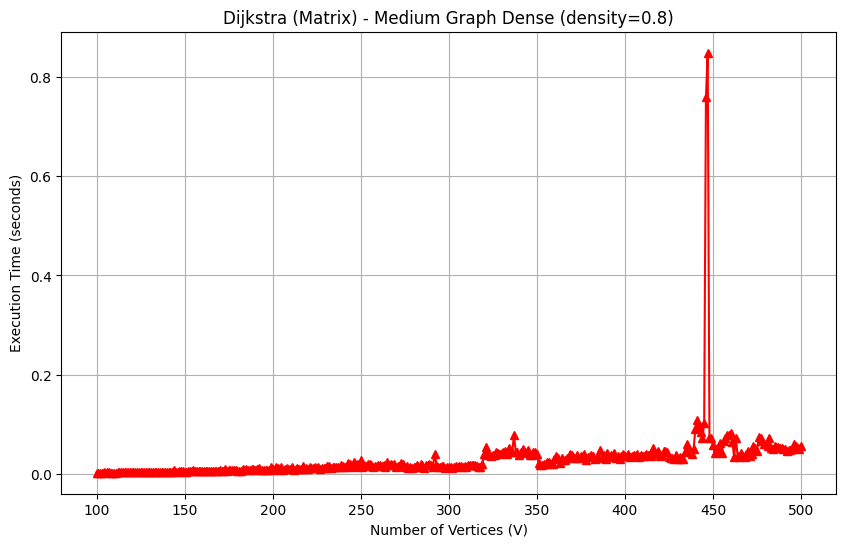

In [10]:
medium_graph_sparse = generate_data(100, 500, 0.2, 2)
medium_graph_medium = generate_data(100, 500, 0.5, 2)
medium_graph_dense = generate_data(100, 500, 0.8, 2)

# Convert to DataFrames
df_sparse = pd.DataFrame(medium_graph_sparse)
df_medium = pd.DataFrame(medium_graph_medium)
df_dense = pd.DataFrame(medium_graph_dense)

# --- Sparse Graph ---
plt.figure(figsize=(10,6))
plt.plot(df_sparse['V'], df_sparse['matrix_time'], marker='o', color='blue')
plt.xlabel("Number of Vertices (V)")
plt.ylabel("Execution Time (seconds)")
plt.title("Dijkstra (Matrix) - Medium Graph Sparse (density=0.2)")
plt.grid(True)
plt.show()

# --- Medium Graph ---
plt.figure(figsize=(10,6))
plt.plot(df_medium['V'], df_medium['matrix_time'], marker='s', color='green')
plt.xlabel("Number of Vertices (V)")
plt.ylabel("Execution Time (seconds)")
plt.title("Dijkstra (Matrix) - Medium Graph Medium (density=0.5)")
plt.grid(True)
plt.show()

# --- Dense Graph ---
plt.figure(figsize=(10,6))
plt.plot(df_dense['V'], df_dense['matrix_time'], marker='^', color='red')
plt.xlabel("Number of Vertices (V)")
plt.ylabel("Execution Time (seconds)")
plt.title("Dijkstra (Matrix) - Medium Graph Dense (density=0.8)")
plt.grid(True)
plt.show()


### Analysis
From the graph we can see an increasing trend for all densities. 

### Large graph with sparse, medium and dense densities graph 

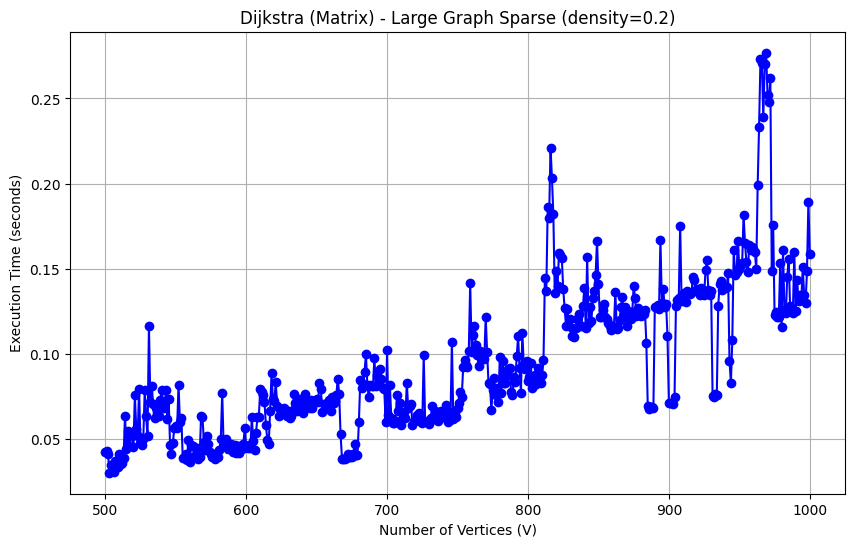

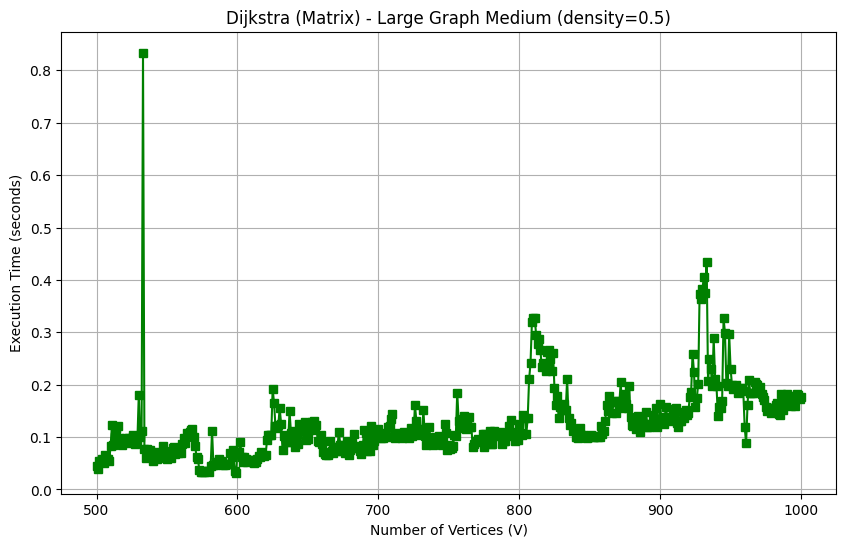

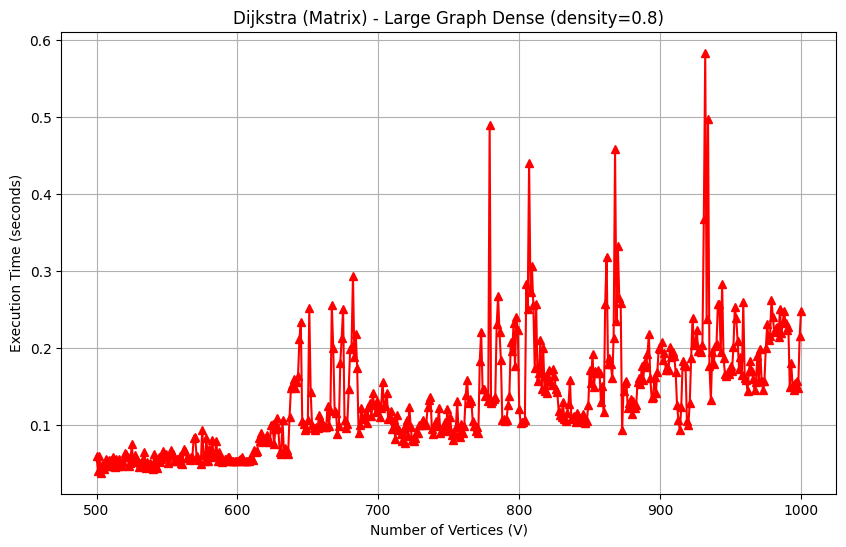

In [12]:
large_graph_sparse = generate_data(500, 1000, 0.2, 2)
large_graph_medium = generate_data(500, 1000, 0.5, 2)
large_graph_dense = generate_data(500, 1000, 0.8, 2)

df_sparse = pd.DataFrame(large_graph_sparse)
df_medium = pd.DataFrame(large_graph_medium)
df_dense = pd.DataFrame(large_graph_dense)

# --- Sparse Graph ---
plt.figure(figsize=(10,6))
plt.plot(df_sparse['V'], df_sparse['matrix_time'], marker='o', color='blue')
plt.xlabel("Number of Vertices (V)")
plt.ylabel("Execution Time (seconds)")
plt.title("Dijkstra (Matrix) - Large Graph Sparse (density=0.2)")
plt.grid(True)
plt.show()

# --- Medium Graph ---
plt.figure(figsize=(10,6))
plt.plot(df_medium['V'], df_medium['matrix_time'], marker='s', color='green')
plt.xlabel("Number of Vertices (V)")
plt.ylabel("Execution Time (seconds)")
plt.title("Dijkstra (Matrix) - Large Graph Medium (density=0.5)")
plt.grid(True)
plt.show()

# --- Dense Graph ---
plt.figure(figsize=(10,6))
plt.plot(df_dense['V'], df_dense['matrix_time'], marker='^', color='red')
plt.xlabel("Number of Vertices (V)")
plt.ylabel("Execution Time (seconds)")
plt.title("Dijkstra (Matrix) - Large Graph Dense (density=0.8)")
plt.grid(True)
plt.show()

### Overall comparison for sparse, medium and dense desities

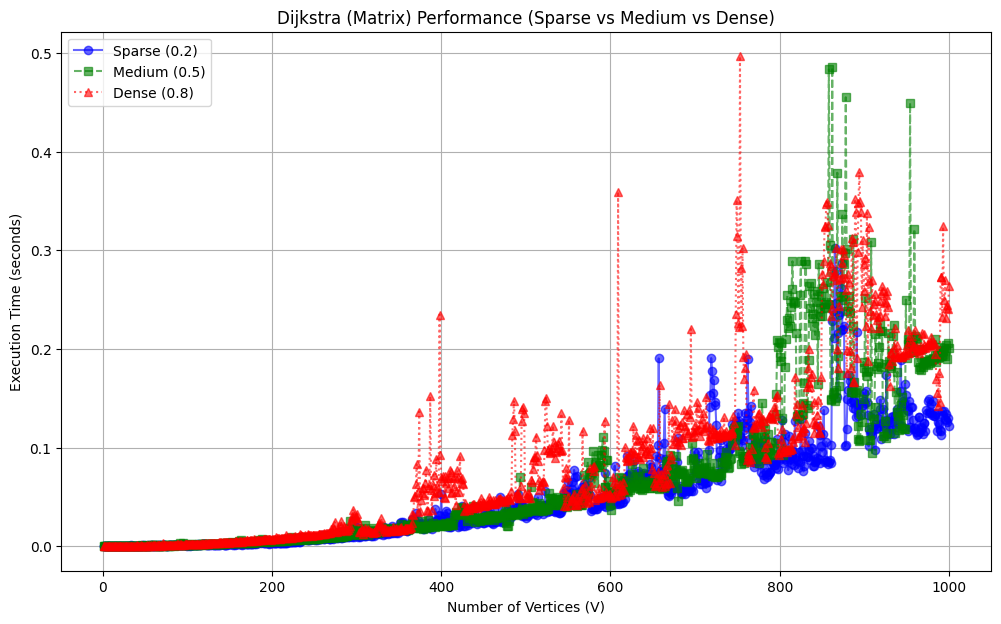

In [ ]:
overall_sparse = generate_data(1, 1000, 0.2, 2)
overall_medium = generate_data(1, 1000, 0.5, 2)
overall_dense = generate_data(1, 1000, 0.8, 2)



### Smoothen the graph for better visualisation

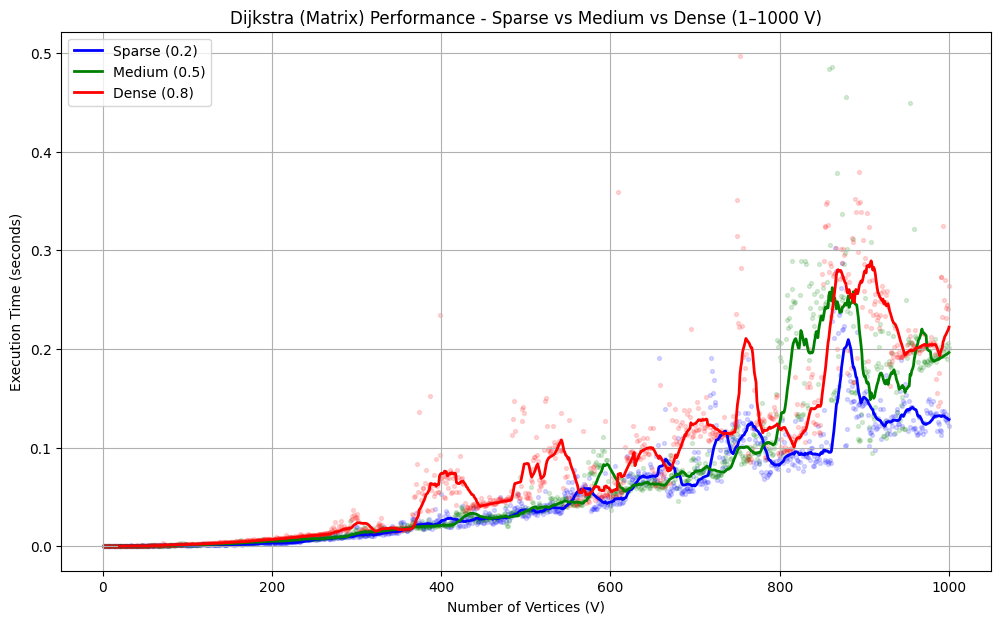

In [22]:
# Convert results into DataFrames
df_sparse = pd.DataFrame(overall_sparse)
df_medium = pd.DataFrame(overall_medium)
df_dense  = pd.DataFrame(overall_dense)

plt.figure(figsize=(12,7))

# Apply rolling mean for smoothing (window=20 to see big trends)
df_sparse["smooth"] = df_sparse["matrix_time"].rolling(window=20).mean()
df_medium["smooth"] = df_medium["matrix_time"].rolling(window=20).mean()
df_dense["smooth"]  = df_dense["matrix_time"].rolling(window=20).mean()

# Plot smoothed trends
plt.plot(df_sparse["V"], df_sparse["smooth"], label="Sparse (0.2)", color="blue", linewidth=2)
plt.plot(df_medium["V"], df_medium["smooth"], label="Medium (0.5)", color="green", linewidth=2)
plt.plot(df_dense["V"], df_dense["smooth"],  label="Dense (0.8)", color="red", linewidth=2)

# Plot faint scatter of raw average runtimes
plt.scatter(df_sparse["V"], df_sparse["matrix_time"], alpha=0.15, color="blue", s=8)
plt.scatter(df_medium["V"], df_medium["matrix_time"], alpha=0.15, color="green", s=8)
plt.scatter(df_dense["V"], df_dense["matrix_time"], alpha=0.15, color="red", s=8)

plt.xlabel("Number of Vertices (V)")
plt.ylabel("Execution Time (seconds)")
plt.title("Dijkstra (Matrix) Performance - Sparse vs Medium vs Dense (1–1000 V)")
plt.legend()
plt.grid(True)
plt.show()




### Dijkstra List

### small graph with sparse, medium and dense densities graph 

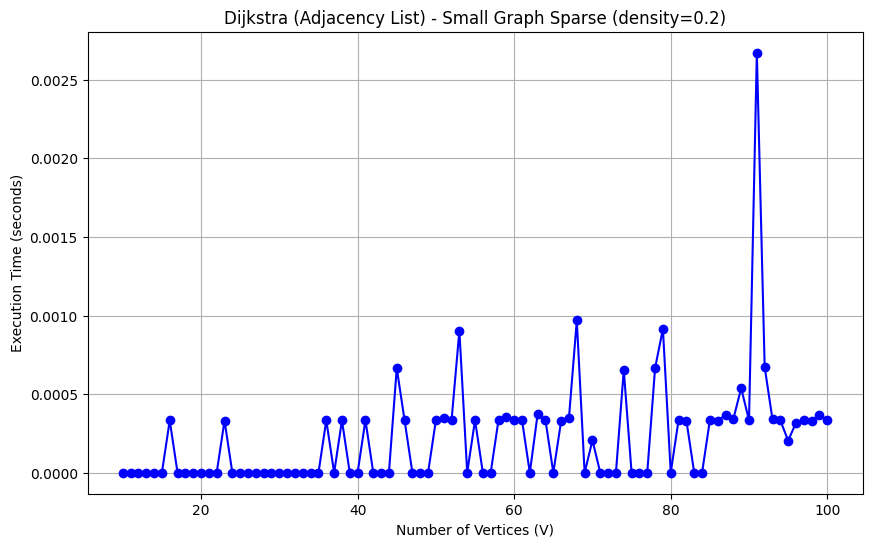

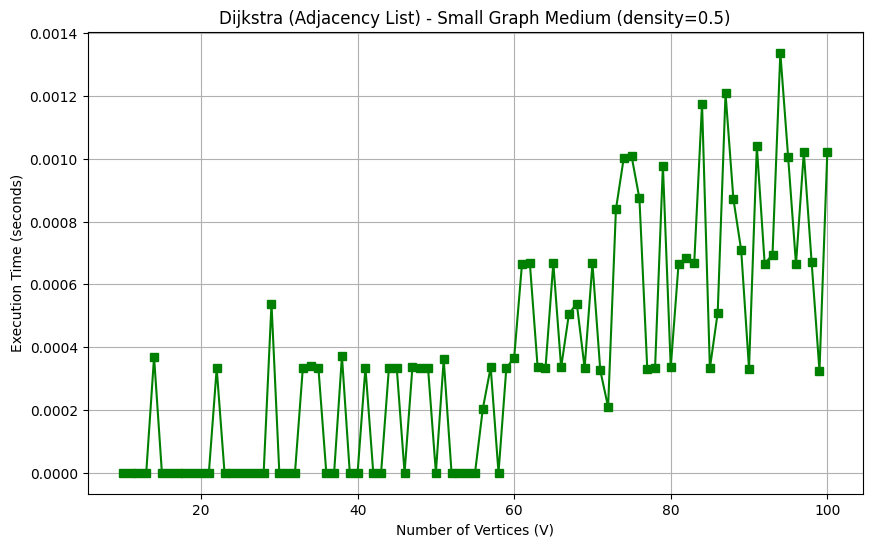

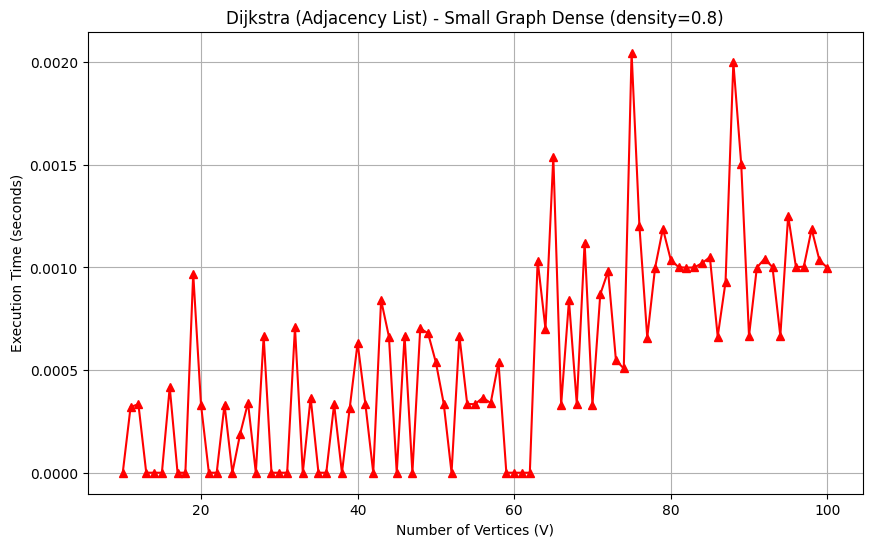

In [16]:
small_graph_sparse = generate_data(10, 100, 0.2, 1)
small_graph_medium = generate_data(10, 100, 0.5, 1)
small_graph_dense = generate_data(10, 100, 0.8, 1)

# Convert to DataFrames
df_sparse_list = pd.DataFrame(small_graph_sparse)
df_medium_list = pd.DataFrame(small_graph_medium)
df_dense_list = pd.DataFrame(small_graph_dense)

# --- Sparse Graph ---
plt.figure(figsize=(10,6))
plt.plot(df_sparse_list['V'], df_sparse_list['list_time'], marker='o', color='blue')
plt.xlabel("Number of Vertices (V)")
plt.ylabel("Execution Time (seconds)")
plt.title("Dijkstra (Adjacency List) - Small Graph Sparse (density=0.2)")
plt.grid(True)
plt.show()

# --- Medium Graph ---
plt.figure(figsize=(10,6))
plt.plot(df_medium_list['V'], df_medium_list['list_time'], marker='s', color='green')
plt.xlabel("Number of Vertices (V)")
plt.ylabel("Execution Time (seconds)")
plt.title("Dijkstra (Adjacency List) - Small Graph Medium (density=0.5)")
plt.grid(True)
plt.show()

# --- Dense Graph ---
plt.figure(figsize=(10,6))
plt.plot(df_dense_list['V'], df_dense_list['list_time'], marker='^', color='red')
plt.xlabel("Number of Vertices (V)")
plt.ylabel("Execution Time (seconds)")
plt.title("Dijkstra (Adjacency List) - Small Graph Dense (density=0.8)")
plt.grid(True)
plt.show()

### Medium graph with sparse, medium and dense densities graph 

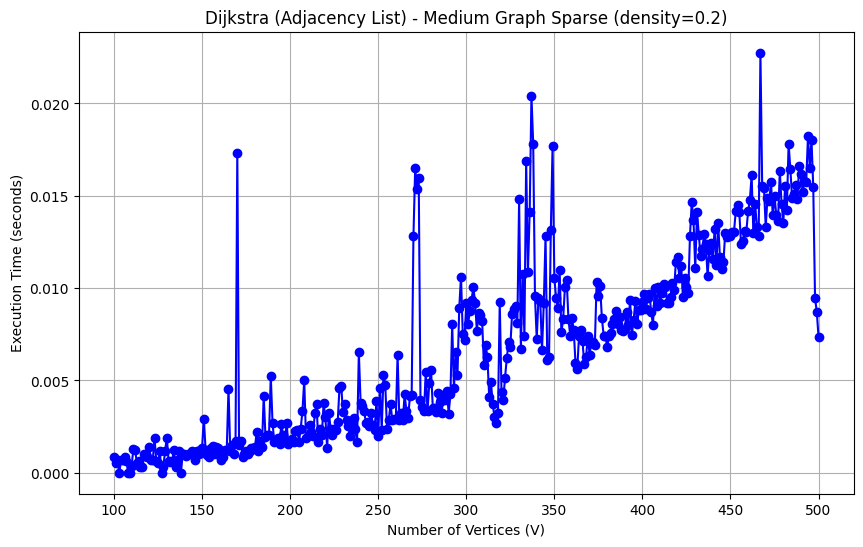

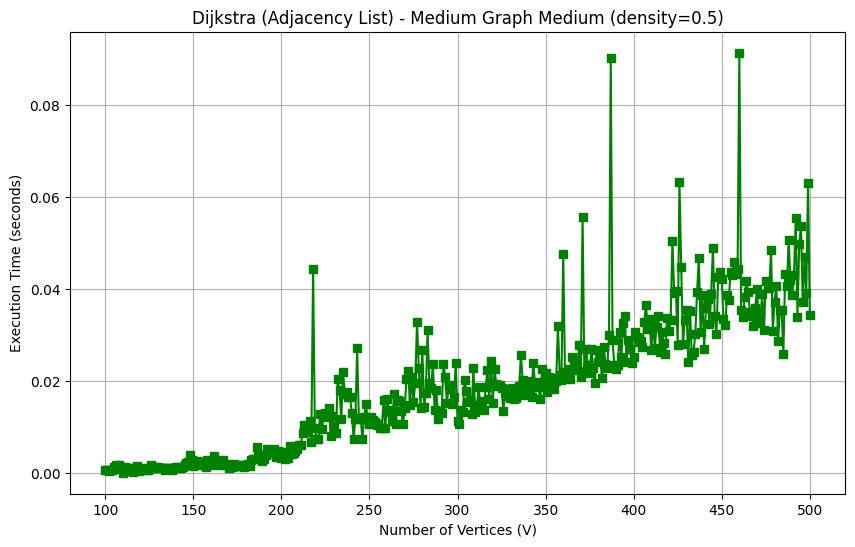

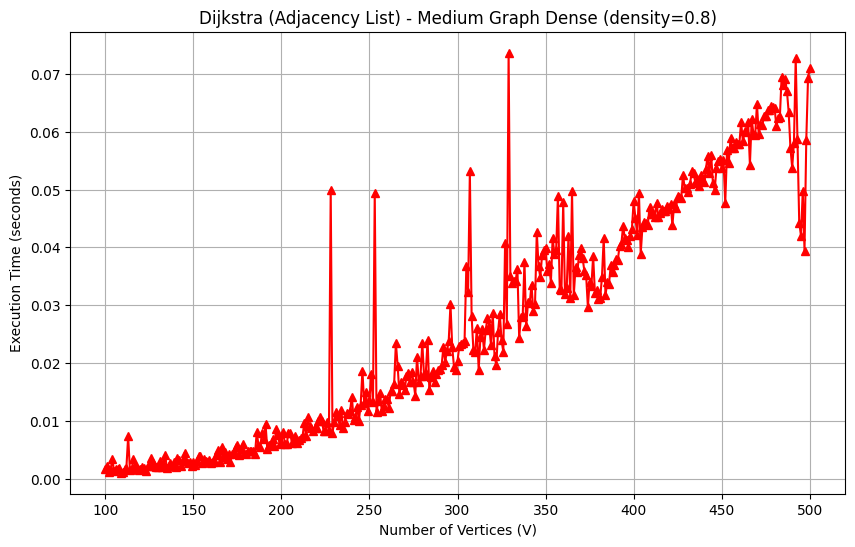

In [17]:
medium_graph_sparse = generate_data(100, 500, 0.2, 1)
medium_graph_medium = generate_data(100, 500, 0.5, 1)
medium_graph_dense = generate_data(100, 500, 0.8, 1)

# Convert to DataFrames
df_sparse_list = pd.DataFrame(medium_graph_sparse)
df_medium_list = pd.DataFrame(medium_graph_medium)
df_dense_list = pd.DataFrame(medium_graph_dense)

# --- Sparse Graph ---
plt.figure(figsize=(10,6))
plt.plot(df_sparse_list['V'], df_sparse_list['list_time'], marker='o', color='blue')
plt.xlabel("Number of Vertices (V)")
plt.ylabel("Execution Time (seconds)")
plt.title("Dijkstra (Adjacency List) - Medium Graph Sparse (density=0.2)")
plt.grid(True)
plt.show()

# --- Medium Graph ---
plt.figure(figsize=(10,6))
plt.plot(df_medium_list['V'], df_medium_list['list_time'], marker='s', color='green')
plt.xlabel("Number of Vertices (V)")
plt.ylabel("Execution Time (seconds)")
plt.title("Dijkstra (Adjacency List) - Medium Graph Medium (density=0.5)")
plt.grid(True)
plt.show()

# --- Dense Graph ---
plt.figure(figsize=(10,6))
plt.plot(df_dense_list['V'], df_dense_list['list_time'], marker='^', color='red')
plt.xlabel("Number of Vertices (V)")
plt.ylabel("Execution Time (seconds)")
plt.title("Dijkstra (Adjacency List) - Medium Graph Dense (density=0.8)")
plt.grid(True)
plt.show()


### Large graph with sparse, medium and dense densities graph 

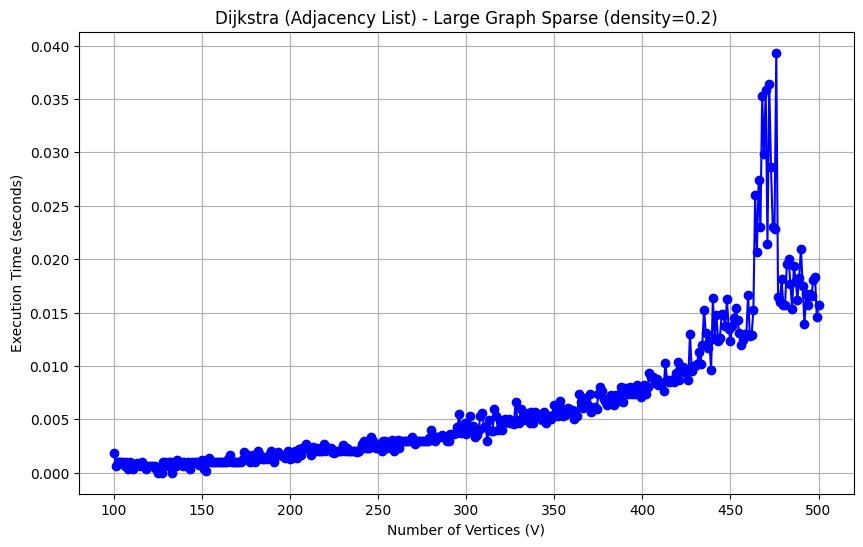

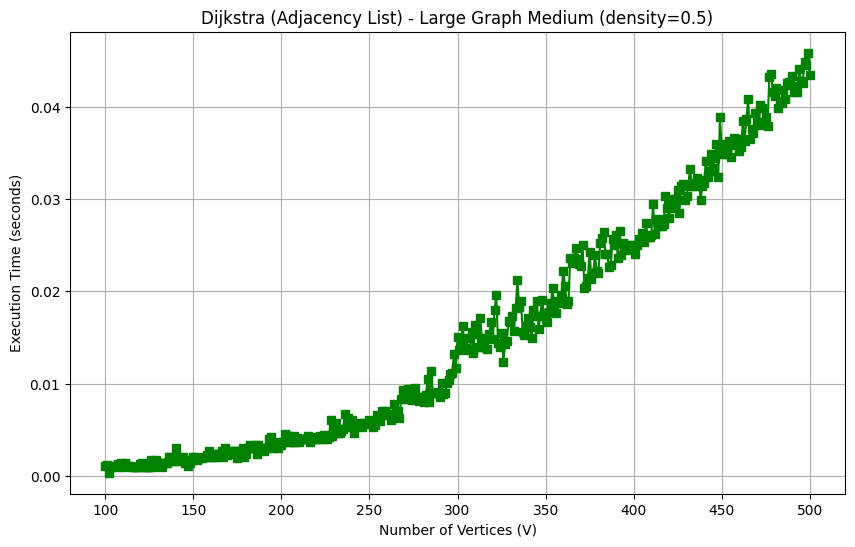

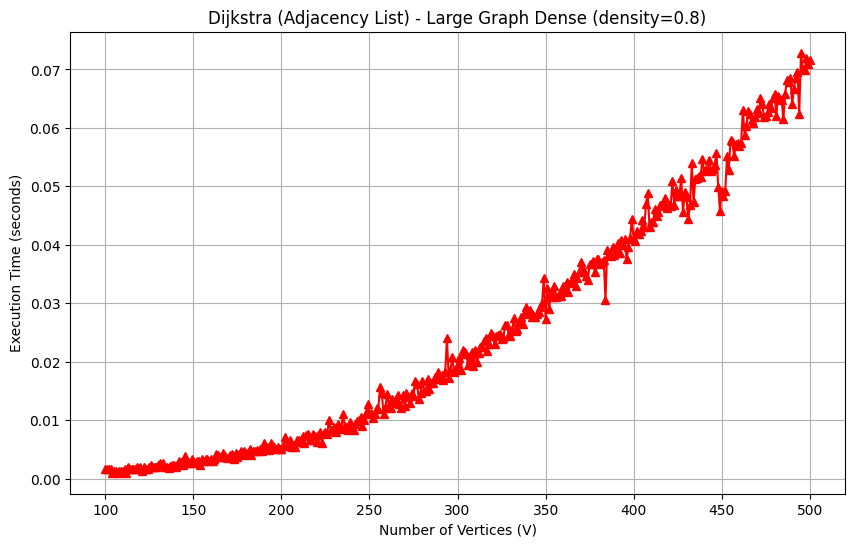

In [18]:
large_graph_sparse = generate_data(100, 500, 0.2, 1)
large_graph_medium = generate_data(100, 500, 0.5, 1)
large_graph_dense = generate_data(100, 500, 0.8, 1)

# Convert to DataFrames
df_sparse_list = pd.DataFrame(large_graph_sparse)
df_medium_list = pd.DataFrame(large_graph_medium)
df_dense_list = pd.DataFrame(large_graph_dense)

# --- Sparse Graph ---
plt.figure(figsize=(10,6))
plt.plot(df_sparse_list['V'], df_sparse_list['list_time'], marker='o', color='blue')
plt.xlabel("Number of Vertices (V)")
plt.ylabel("Execution Time (seconds)")
plt.title("Dijkstra (Adjacency List) - Large Graph Sparse (density=0.2)")
plt.grid(True)
plt.show()

# --- Medium Graph ---
plt.figure(figsize=(10,6))
plt.plot(df_medium_list['V'], df_medium_list['list_time'], marker='s', color='green')
plt.xlabel("Number of Vertices (V)")
plt.ylabel("Execution Time (seconds)")
plt.title("Dijkstra (Adjacency List) - Large Graph Medium (density=0.5)")
plt.grid(True)
plt.show()

# --- Dense Graph ---
plt.figure(figsize=(10,6))
plt.plot(df_dense_list['V'], df_dense_list['list_time'], marker='^', color='red')
plt.xlabel("Number of Vertices (V)")
plt.ylabel("Execution Time (seconds)")
plt.title("Dijkstra (Adjacency List) - Large Graph Dense (density=0.8)")
plt.grid(True)
plt.show()


### Overall Comparison

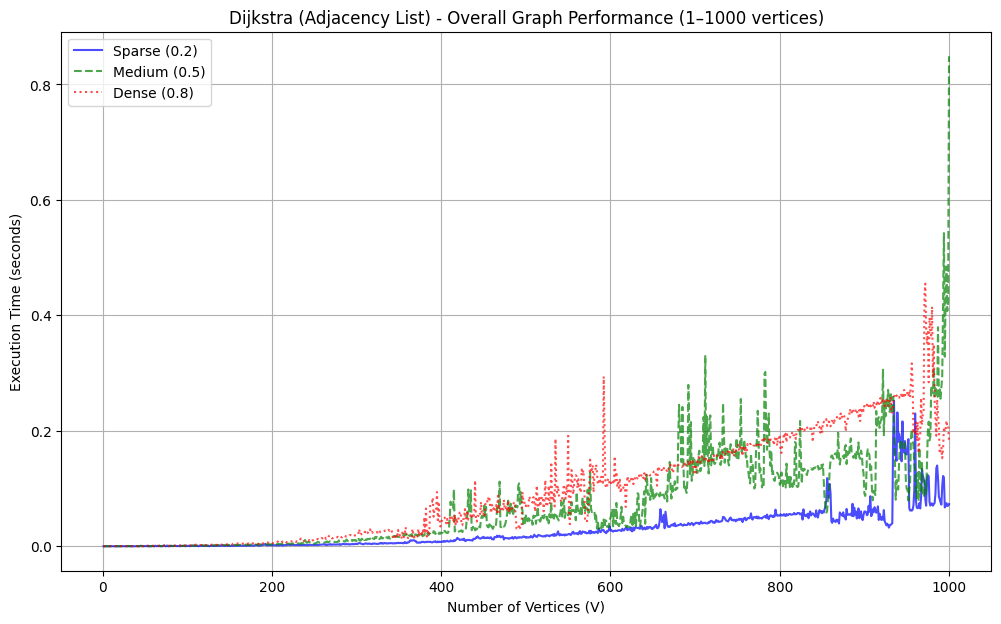

In [ ]:
overall_graph_sparse = generate_data(1, 1000, 0.2, 1)
overall_graph_medium = generate_data(1, 1000, 0.5, 1)
overall_graph_dense = generate_data(1, 1000, 0.8, 1)

# Convert to DataFrames
df_sparse_list = pd.DataFrame(overall_graph_sparse)
df_medium_list = pd.DataFrame(overall_graph_medium)
df_dense_list = pd.DataFrame(overall_graph_dense)

plt.figure(figsize=(12,7))

# Plot with different styles so they don't overlap
plt.plot(df_sparse_list['V'], df_sparse_list['list_time'], 
         label="Sparse (0.2)", color='blue', linestyle='-', alpha=0.7)

plt.plot(df_medium_list['V'], df_medium_list['list_time'], 
         label="Medium (0.5)", color='green', linestyle='--', alpha=0.7)

plt.plot(df_dense_list['V'], df_dense_list['list_time'], 
         label="Dense (0.8)", color='red', linestyle=':', alpha=0.7)

plt.xlabel("Number of Vertices (V)")
plt.ylabel("Execution Time (seconds)")
plt.title("Dijkstra (Adjacency List) - Overall Graph Performance (1–1000 vertices)")
plt.legend()
plt.grid(True)
plt.show()


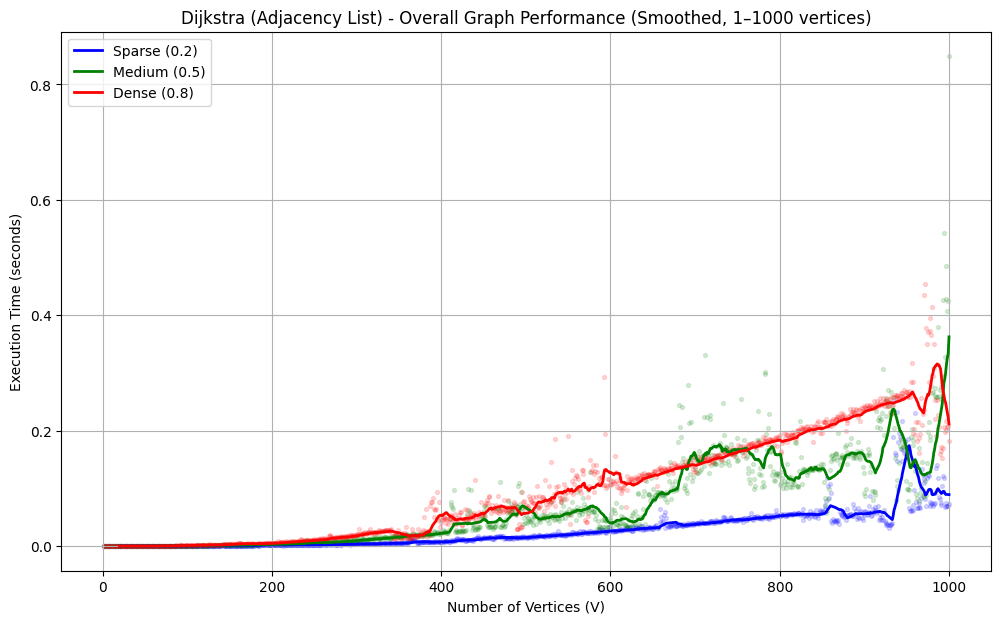

In [29]:
df_sparse_list = pd.DataFrame(overall_graph_sparse)
df_medium_list = pd.DataFrame(overall_graph_medium)
df_dense_list  = pd.DataFrame(overall_graph_dense)

# Apply rolling mean (smoothing)
df_sparse_list["smooth"] = df_sparse_list["list_time"].rolling(window=20).mean()
df_medium_list["smooth"] = df_medium_list["list_time"].rolling(window=20).mean()
df_dense_list["smooth"]  = df_dense_list["list_time"].rolling(window=20).mean()

plt.figure(figsize=(12,7))

# Smoothed trend lines
plt.plot(df_sparse_list["V"], df_sparse_list["smooth"], 
         label="Sparse (0.2)", color="blue", linewidth=2)

plt.plot(df_medium_list["V"], df_medium_list["smooth"], 
         label="Medium (0.5)", color="green", linewidth=2)

plt.plot(df_dense_list["V"], df_dense_list["smooth"],  
         label="Dense (0.8)", color="red", linewidth=2)

# Raw scatter (faint)
plt.scatter(df_sparse_list["V"], df_sparse_list["list_time"], alpha=0.15, color="blue", s=8)
plt.scatter(df_medium_list["V"], df_medium_list["list_time"], alpha=0.15, color="green", s=8)
plt.scatter(df_dense_list["V"], df_dense_list["list_time"], alpha=0.15, color="red", s=8)

plt.xlabel("Number of Vertices (V)")
plt.ylabel("Execution Time (seconds)")
plt.title("Dijkstra (Adjacency List) - Overall Graph Performance (Smoothed, 1–1000 vertices)")
plt.legend()
plt.grid(True)
plt.show()

### Comparisons between the 2 algorithms

### Sparse graph comparisons

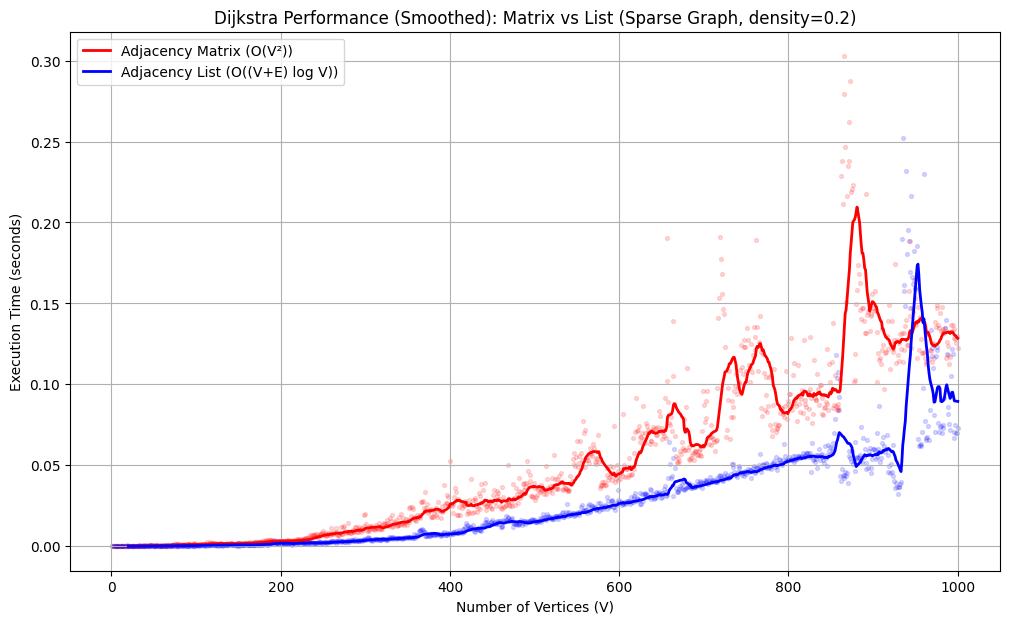

In [27]:
matrix_data = overall_sparse
list_data   = overall_graph_sparse

# Convert to DataFrames
df_matrix = pd.DataFrame(matrix_data)
df_list   = pd.DataFrame(list_data)

# Apply rolling mean to smooth (window=20)
df_matrix["smooth"] = df_matrix["matrix_time"].rolling(window=20).mean()
df_list["smooth"]   = df_list["list_time"].rolling(window=20).mean()

plt.figure(figsize=(12,7))

# Smoothed trend lines
plt.plot(df_matrix["V"], df_matrix["smooth"], 
         label="Adjacency Matrix (O(V²))", color="red", linewidth=2)

plt.plot(df_list["V"], df_list["smooth"], 
         label="Adjacency List (O((V+E) log V))", color="blue", linewidth=2)

# Faint scatter for raw average runtimes
plt.scatter(df_matrix["V"], df_matrix["matrix_time"], alpha=0.15, color="red", s=8)
plt.scatter(df_list["V"], df_list["list_time"], alpha=0.15, color="blue", s=8)

plt.xlabel("Number of Vertices (V)")
plt.ylabel("Execution Time (seconds)")
plt.title("Dijkstra Performance (Smoothed): Matrix vs List (Sparse Graph, density=0.2)")
plt.legend()
plt.grid(True)
plt.show()



### Medium graph comparisons

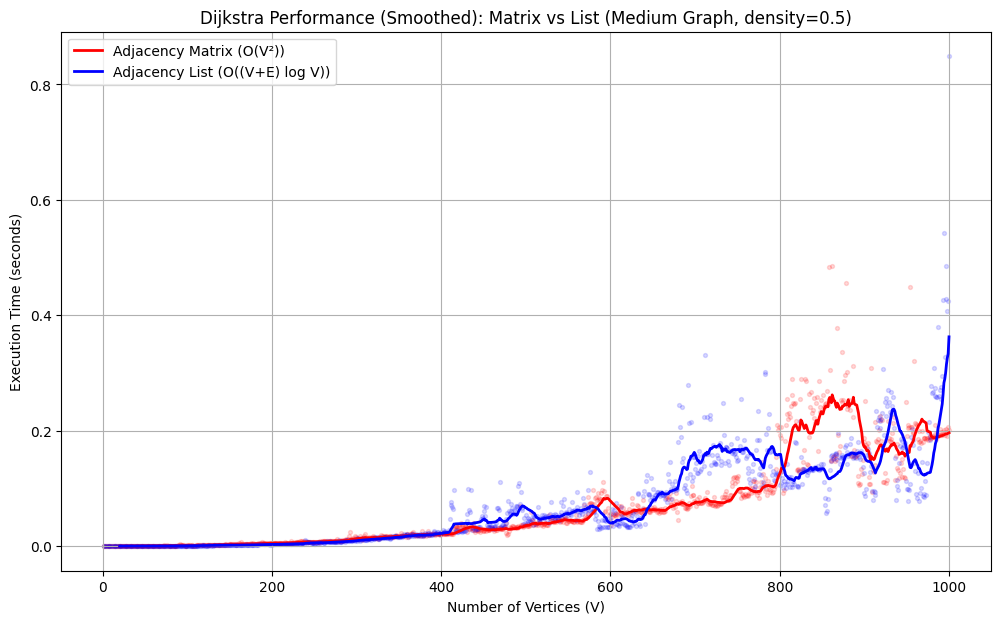

In [26]:
matrix_data = overall_medium
list_data   = overall_graph_medium

# Convert to DataFrames
df_matrix = pd.DataFrame(matrix_data)
df_list   = pd.DataFrame(list_data)

# Apply rolling mean (window=20 vertices, tweak if needed)
df_matrix["smooth"] = df_matrix["matrix_time"].rolling(window=20).mean()
df_list["smooth"]   = df_list["list_time"].rolling(window=20).mean()

plt.figure(figsize=(12,7))

# Plot smoothed lines
plt.plot(df_matrix["V"], df_matrix["smooth"], 
         label="Adjacency Matrix (O(V²))", color="red", linewidth=2)

plt.plot(df_list["V"], df_list["smooth"], 
         label="Adjacency List (O((V+E) log V))", color="blue", linewidth=2)

# Add faint scatter for raw averages
plt.scatter(df_matrix["V"], df_matrix["matrix_time"], alpha=0.15, color="red", s=8)
plt.scatter(df_list["V"], df_list["list_time"], alpha=0.15, color="blue", s=8)

plt.xlabel("Number of Vertices (V)")
plt.ylabel("Execution Time (seconds)")
plt.title("Dijkstra Performance (Smoothed): Matrix vs List (Medium Graph, density=0.5)")
plt.legend()
plt.grid(True)
plt.show()



Dense graph comparisons

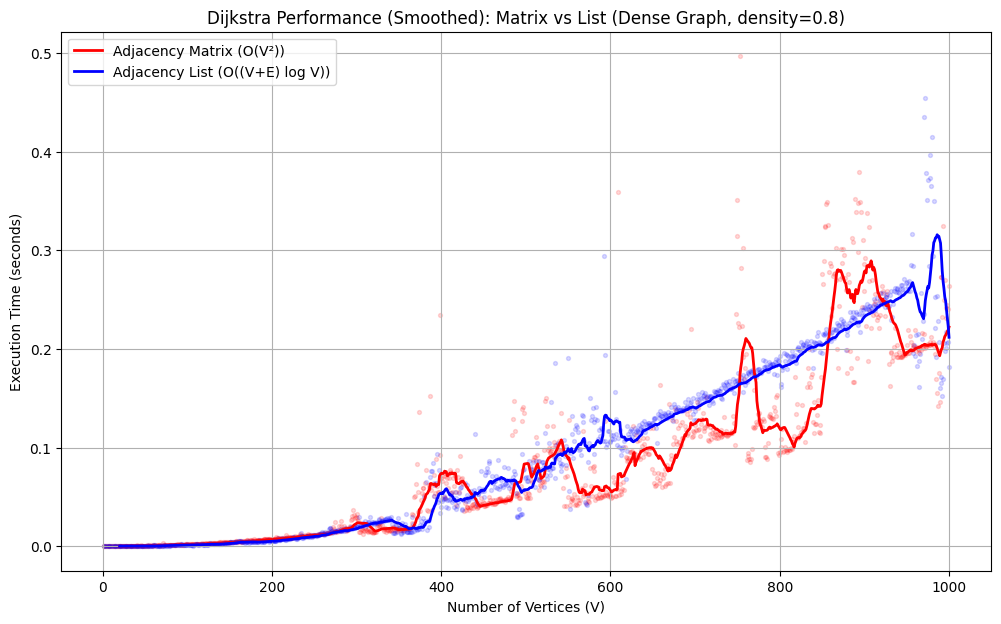

In [28]:
matrix_data = overall_dense
list_data   = overall_graph_dense

# Convert to DataFrames
df_matrix = pd.DataFrame(matrix_data)
df_list   = pd.DataFrame(list_data)

# Apply rolling mean smoothing (adjust window if needed)
df_matrix["smooth"] = df_matrix["matrix_time"].rolling(window=20).mean()
df_list["smooth"]   = df_list["list_time"].rolling(window=20).mean()

plt.figure(figsize=(12,7))

# Smoothed trend lines
plt.plot(df_matrix["V"], df_matrix["smooth"], 
         label="Adjacency Matrix (O(V²))", color="red", linewidth=2)

plt.plot(df_list["V"], df_list["smooth"], 
         label="Adjacency List (O((V+E) log V))", color="blue", linewidth=2)

# Raw scatter (faint)
plt.scatter(df_matrix["V"], df_matrix["matrix_time"], alpha=0.15, color="red", s=8)
plt.scatter(df_list["V"], df_list["list_time"], alpha=0.15, color="blue", s=8)

plt.xlabel("Number of Vertices (V)")
plt.ylabel("Execution Time (seconds)")
plt.title("Dijkstra Performance (Smoothed): Matrix vs List (Dense Graph, density=0.8)")
plt.legend()
plt.grid(True)
plt.show()
